In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import numpy as np
from tqdm import notebook
from sklearn.metrics import confusion_matrix

In [2]:
[predictions_list, labels_all_deg_seed, labels_all_simba_seed, labels_all_simba_seed2] = \
    np.load('../temp/predictions_20seeds.npy', allow_pickle=True)

In [3]:
with open('/Users/alexanderhsu/Google Drive/My Drive/2023Data/asoid/ALL_test_data.sav', 'rb') as fr:
    [data_test, targets_test] = joblib.load(fr)

In [4]:
cmats_simba = []
cmats_deg = []
cmats_asoid = []
for s in notebook.tqdm(range(len(predictions_list[-1]))):
    cmats_simba.append(confusion_matrix(targets_test,
                                        labels_all_simba_seed2[s],
                                        normalize='true'))
    cmats_deg.append(confusion_matrix(targets_test,
                                      labels_all_deg_seed[s],
                                      normalize='true'))
    cmats_asoid.append(confusion_matrix(targets_test,
                                        predictions_list[-1][s],
                                        normalize='true'))


  0%|          | 0/20 [00:00<?, ?it/s]

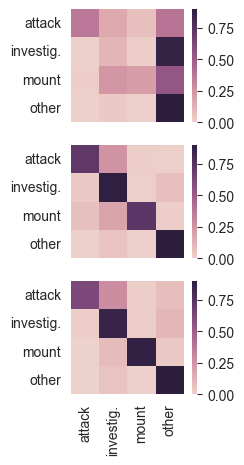

In [8]:
rows = 3
cols = 1

fig, ax = plt.subplots(rows, cols, figsize=(2, 5))
for row in range(rows):
    if row == 0:
        sns.heatmap(np.mean(cmats_simba, axis=0),
                    cmap=sns.cubehelix_palette(as_cmap=True),
                    square=True,
                    vmin=0, vmax=0.9, ax=ax[row])
    elif row == 1:
        sns.heatmap(np.mean(cmats_deg, axis=0),
                    cmap=sns.cubehelix_palette(as_cmap=True),
                    square=True,
                    vmin=0, vmax=0.9, ax=ax[row])
    elif row == 2:
        sns.heatmap(np.mean(cmats_asoid, axis=0),
                    cmap=sns.cubehelix_palette(as_cmap=True),
                    square=True,
                    vmin=0, vmax=0.9, ax=ax[row])

    if row == rows-1:
        ax[row].set_xticks(np.arange(.5, 4.5, 1))
        ax[row].set_xticklabels(['attack', 'investig.', 'mount', 'other'], rotation=90)
    else:
        ax[row].set_xticklabels('')
    ax[row].set_yticks(np.arange(.5, 4.5, 1))
    ax[row].set_yticklabels(['attack', 'investig.', 'mount', 'other'], rotation=0)
    ax[row].grid(False)
plt.show()
fig.savefig('/Users/alexanderhsu/Google Drive/My Drive/manuscript_figures/asoid/additional/prediction_confusion.svg')